#Percentage Marks Prediction 
## Simple Linear Regression
##TSF GRIP TASK
##Submitted By:- AKASH VERMA

##Importing necessary libraries

In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

##Reading the Data

In [2]:
# Reading data from remote link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")

Data imported successfully


##Data Exploration

In [3]:
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
data.shape

(25, 2)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


##Data Visualization

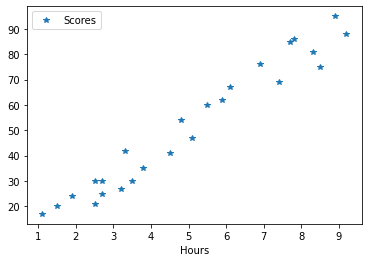

In [8]:
data.plot(x='Hours',y='Scores',style='*')
plt.show()

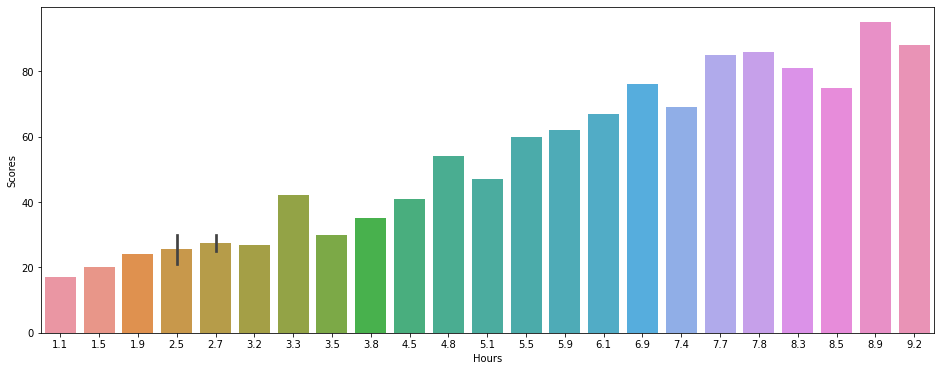

In [9]:
plt.figure(figsize=(16,6))
sns.barplot(x='Hours',y='Scores',data=data)
plt.show()

##Separating the Data

In [10]:
array=data.values
X=array[:,0]
Y=array[:,1]
X=X.reshape(-1,1)

##Splitting the dataset

In [11]:
x_train,x_valid,y_train,y_valid=train_test_split(X,Y,test_size=0.33,random_state=1)

##Building the Model

In [12]:
Model=LinearRegression()
Model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
Model.coef_

array([10.33097478])

In [14]:
Model.intercept_

-0.8005598320503751

In [15]:
Model.score(x_valid,y_valid)

0.9047140370739194

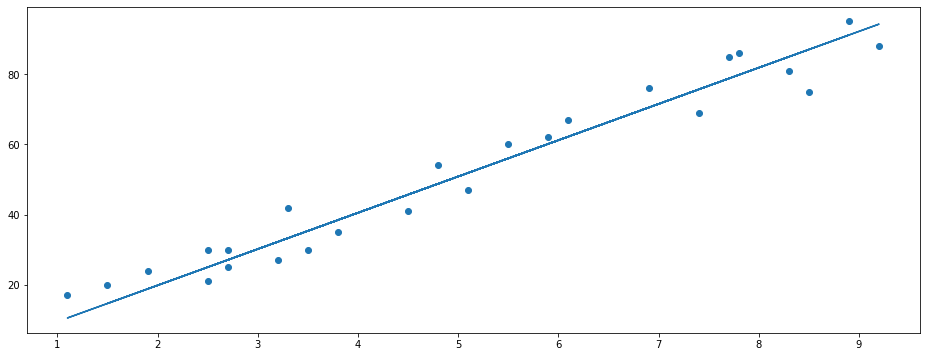

In [16]:
# Plotting the regression line
line = Model.coef_*X+Model.intercept_
plt.figure(figsize=(16,6))
# Plotting for the test data
plt.scatter(X, Y)
plt.plot(X, line);
plt.show()

In [17]:
y_pred=Model.predict(x_valid)

In [18]:
error = mean_absolute_error(y_valid, y_pred)
print("Mean Absolute error:",error)

Mean Absolute error: 6.731257577459272


In [19]:
accuracy = Model.score(x_valid, y_valid)
print("Accuracy:",round(accuracy*100,2),"%")

Accuracy: 90.47 %


What will be predicted score if a student studies for 9.25 hrs/ day?



In [20]:
prediction=Model.predict([[9.25]])
print("Predicted score if a student studies for 9.25 hrs/day =",prediction[0])

Predicted score if a student studies for 9.25 hrs/day = 94.76095689811575
